In [1]:
from uniphm.data.loader.PHM2012Loader import PHM2012Loader
from uniphm.data.loader.XJTULoader import XJTULoader
from uniphm.data.loader.CMAPSSLoader import CMAPSSLoader
from uniphm.data.process.EntityPipeline import EntityPipeline
from uniphm.data.process.array.KurtosisProcessor import KurtosisProcessor
from uniphm.data.process.array.MaxProcessor import MaxProcessor
from uniphm.data.process.array.MeanAbsProcessor import MeanAbsProcessor
from uniphm.data.process.array.MeanProcessor import MeanProcessor
from uniphm.data.process.array.MinProcessor import MinProcessor
from uniphm.data.process.array.PTPProcessor import PTPProcessor
from uniphm.data.process.array.RMSProcessor import RMSProcessor
from uniphm.data.process.array.SkewProcessor import SkewProcessor
from uniphm.data.process.array.StdProcessor import StdProcessor
from uniphm.data.process.array.VarProcessor import VarProcessor
from uniphm.data.process.entity.ThreeSigmaFPTCalculator import ThreeSigmaFPTCalculator
from uniphm.util.Plotter import Plotter

In [2]:
Plotter.DPI = 40
Plotter.SIZE = (10, 6)

# 定义数据加载器

In [3]:
# data_loader = XJTULoader('D:\\data\\dataset\\XJTU-SY_Bearing_Datasets')
data_loader = PHM2012Loader('D:\\data\\dataset\\phm-ieee-2012-data-challenge-dataset-master')

[DEBUG   17:16:08]  
[DataLoader]  Root directory: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master
	✓ Bearing1_1, location: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing1_1
	✓ Bearing1_2, location: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing1_2
	✓ Bearing2_1, location: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing2_1
	✓ Bearing2_2, location: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing2_2
	✓ Bearing3_1, location: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing3_1
	✓ Bearing3_2, location: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing3_2
	✓ Bearing1_3, location: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master\Full_Test_Set\Bearing1_3
	✓ Bearing1_4, location: D:\data\dataset\phm-ieee-2012-data-challenge-dataset-master\Full_Test_Set\Bearing1_4
	✓ Bearing1_5, 

# 选择性读取数据(include模式)

[INFO    17:16:08]  [DataLoader]  -> Loading data entity: Bearing1_1
[INFO    17:16:12]  [DataLoader]  ✓ Successfully loaded: Bearing1_1


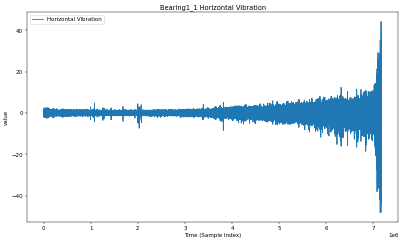

'default'

In [4]:
bearing = data_loader("Bearing1_1", include='Horizontal Vibration')
Plotter.entity(bearing)

# 选择性读取数据(exclude模式)

[INFO    17:16:17]  [DataLoader]  -> Loading data entity: Bearing1_1
[INFO    17:16:21]  [DataLoader]  ✓ Successfully loaded: Bearing1_1


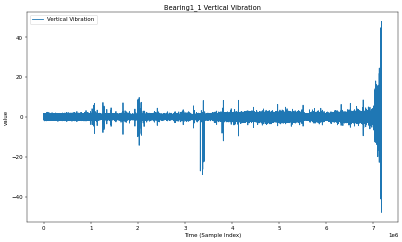

'default'

In [5]:
bearing = data_loader("Bearing1_1", exclude='Horizontal Vibration')
Plotter.entity(bearing)

# 读取完整数据

[INFO    17:16:25]  [DataLoader]  -> Loading data entity: Bearing1_1
[INFO    17:16:29]  [DataLoader]  ✓ Successfully loaded: Bearing1_1


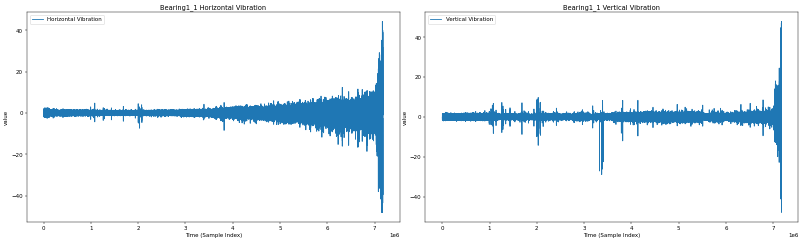

'default'

In [6]:
bearing = data_loader("Bearing1_1")
Plotter.entity(bearing)

# 特征提取流水线（即时模式）

[DEBUG   17:16:38]  [EntityPipeline]  RUN ONCE using RMSProcessor on key 'Vertical Vibration'
[DEBUG   17:16:38]  [EntityPipeline]  Running ABCBaseProcessor 'RMSProcessor' on 'Vertical Vibration' -> 'H_RMS'
[DEBUG   17:16:38]  [EntityPipeline]  RUN ONCE using KurtosisProcessor on key 'Horizontal Vibration'
[DEBUG   17:16:38]  [EntityPipeline]  Running ABCBaseProcessor 'KurtosisProcessor' on 'Horizontal Vibration' -> 'H_RMS'


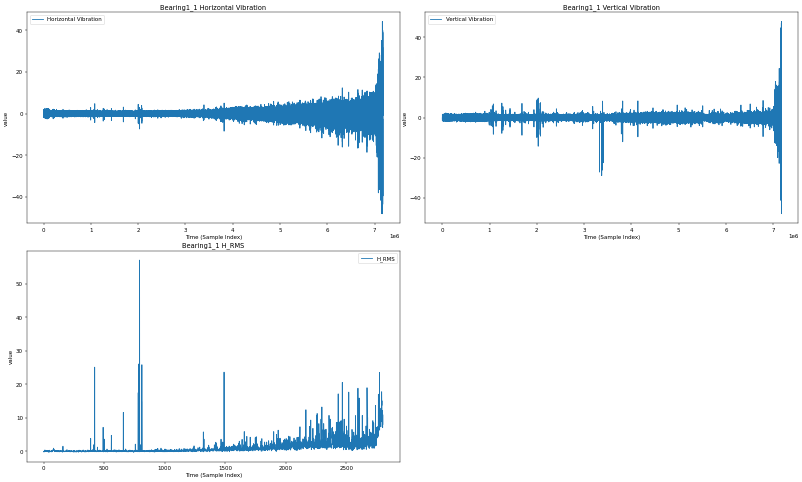

'default'

In [7]:
pipeline = EntityPipeline()
pipeline.step(
    entity=bearing,
    processor=RMSProcessor(data_loader['continuum']),
    input_key='Vertical Vibration',
    output_key='H_RMS'
)
pipeline.step(
    entity=bearing,
    processor=KurtosisProcessor(data_loader['continuum']),
    input_key='Horizontal Vibration',
    output_key='H_RMS'
)
Plotter.entity(bearing)

# 特征提取流水线（注册模式）

[INFO    17:16:47]  [EntityPipeline]  Registered step: RMSProcessor on 'Vertical Vibration' -> 'V_RMS'
[INFO    17:16:47]  [EntityPipeline]  Registered step: KurtosisProcessor on 'Vertical Vibration' -> 'V_Kurtosis'
[INFO    17:16:47]  [EntityPipeline]  Registered step: MinProcessor on 'Vertical Vibration' -> 'V_Min'
[INFO    17:16:47]  [EntityPipeline]  Registered step: MeanProcessor on 'Vertical Vibration' -> 'V_Mean'
[INFO    17:16:47]  [EntityPipeline]  Registered step: MaxProcessor on 'Vertical Vibration' -> 'V_Max'
[INFO    17:16:47]  [EntityPipeline]  Registered step: MeanAbsProcessor on 'Vertical Vibration' -> 'V_MeanAbs'
[INFO    17:16:47]  [EntityPipeline]  Registered step: PTPProcessor on 'Vertical Vibration' -> 'V_PTP'
[INFO    17:16:47]  [EntityPipeline]  Registered step: SkewProcessor on 'Vertical Vibration' -> 'V_Skew'
[INFO    17:16:47]  [EntityPipeline]  Registered step: VarProcessor on 'Vertical Vibration' -> 'V_Var'
[INFO    17:16:47]  [EntityPipeline]  Registered st

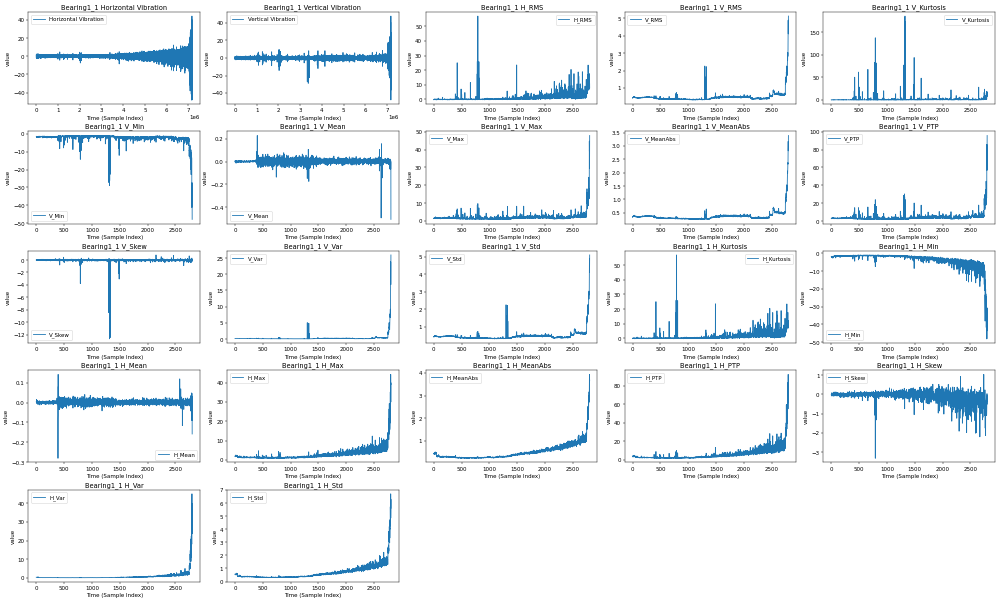

'default'

In [8]:
pipeline = EntityPipeline()
pipeline.register(
    processor=RMSProcessor(data_loader['continuum']),
    input_key='Vertical Vibration',
    output_key='V_RMS'
)
pipeline.register(
    processor=KurtosisProcessor(data_loader['continuum']),
    input_key='Vertical Vibration',
    output_key='V_Kurtosis'
)
pipeline.register(
    processor=MinProcessor(data_loader['continuum']),
    input_key='Vertical Vibration',
    output_key='V_Min'
)
pipeline.register(
    processor=MeanProcessor(data_loader['continuum']),
    input_key='Vertical Vibration',
    output_key='V_Mean'
)
pipeline.register(
    processor=MaxProcessor(data_loader['continuum']),
    input_key='Vertical Vibration',
    output_key='V_Max'
)
pipeline.register(
    processor=MeanAbsProcessor(data_loader['continuum']),
    input_key='Vertical Vibration',
    output_key='V_MeanAbs'
)
pipeline.register(
    processor=PTPProcessor(data_loader['continuum']),
    input_key='Vertical Vibration',
    output_key='V_PTP'
)
pipeline.register(
    processor=SkewProcessor(data_loader['continuum']),
    input_key='Vertical Vibration',
    output_key='V_Skew'
)
pipeline.register(
    processor=VarProcessor(data_loader['continuum']),
    input_key='Vertical Vibration',
    output_key='V_Var'
)
pipeline.register(
    processor=StdProcessor(data_loader['continuum']),
    input_key='Vertical Vibration',
    output_key='V_Std'
)
pipeline.register(
    processor=KurtosisProcessor(data_loader['continuum']),
    input_key='Horizontal Vibration',
    output_key='H_Kurtosis'
)
pipeline.register(
    processor=MinProcessor(data_loader['continuum']),
    input_key='Horizontal Vibration',
    output_key='H_Min'
)
pipeline.register(
    processor=MeanProcessor(data_loader['continuum']),
    input_key='Horizontal Vibration',
    output_key='H_Mean'
)
pipeline.register(
    processor=MaxProcessor(data_loader['continuum']),
    input_key='Horizontal Vibration',
    output_key='H_Max'
)
pipeline.register(
    processor=MeanAbsProcessor(data_loader['continuum']),
    input_key='Horizontal Vibration',
    output_key='H_MeanAbs'
)
pipeline.register(
    processor=PTPProcessor(data_loader['continuum']),
    input_key='Horizontal Vibration',
    output_key='H_PTP'
)
pipeline.register(
    processor=SkewProcessor(data_loader['continuum']),
    input_key='Horizontal Vibration',
    output_key='H_Skew'
)
pipeline.register(
    processor=VarProcessor(data_loader['continuum']),
    input_key='Horizontal Vibration',
    output_key='H_Var'
)
pipeline.register(
    processor=StdProcessor(data_loader['continuum']),
    input_key='Horizontal Vibration',
    output_key='H_Std'
)

pipeline.execute(bearing)
Plotter.SIZE = (5, 3)
Plotter.entity(bearing)

# ThreeSigmaFPTCalculator作为特殊的数据处理器，因为不产生新的特征，因此可以省略output_key

[DEBUG   17:17:00]  [EntityPipeline]  RUN ONCE using ThreeSigmaFPTCalculator on key 'H_RMS'
[DEBUG   17:17:00]  [EntityPipeline]  Executing ABCEntityProcessor 'ThreeSigmaFPTCalculator'...


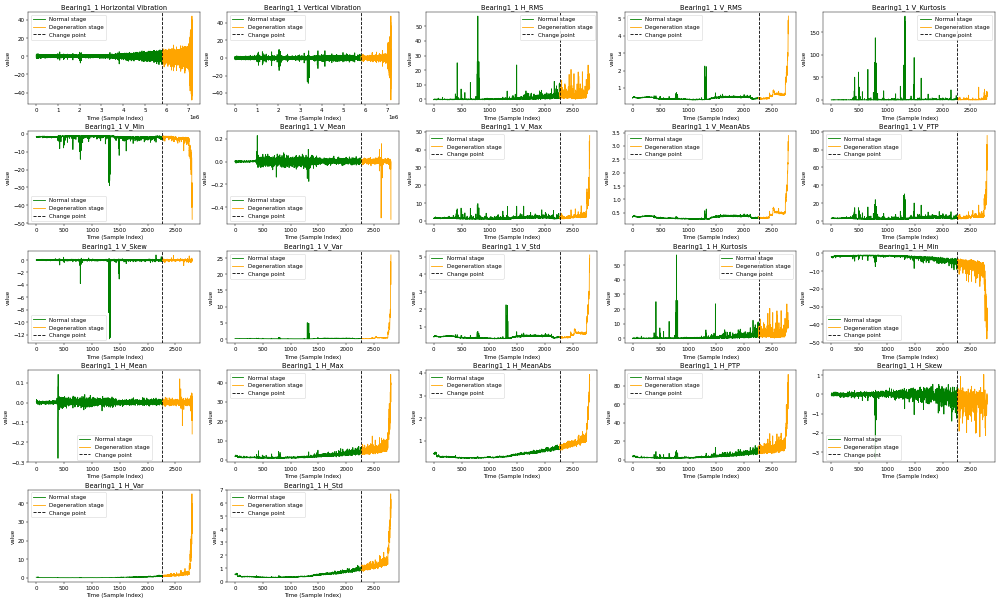

'default'

In [9]:
pipeline.step(
    entity=bearing,
    processor=ThreeSigmaFPTCalculator(),
    input_key='H_RMS'
)
Plotter.entity(bearing)

# 选择性可视化

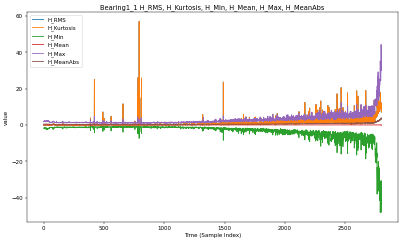

'default'

In [10]:
Plotter.SIZE = (10, 6)
Plotter.entity(bearing, ['H_RMS', 'H_Kurtosis', 'H_Min', 'H_Mean', 'H_Max', 'H_MeanAbs'])

# 涡扇发动机数据集

In [11]:
data_loader = CMAPSSLoader('D:\\data\\dataset\\CMAPSSData')
sensor = ['T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30', 'phi', 'NRF', 'NRc', 'BPR', 'htBleed', 'W31', 'W32']
sensor_norm = ['norm_' + s for s in sensor]

[DEBUG   17:17:09]  
[DataLoader]  Root directory: D:\data\dataset\CMAPSSData
	✓ FD001_RUL, location: D:\data\dataset\CMAPSSData\RUL_FD001.txt
	✓ FD002_RUL, location: D:\data\dataset\CMAPSSData\RUL_FD002.txt
	✓ FD003_RUL, location: D:\data\dataset\CMAPSSData\RUL_FD003.txt
	✓ FD004_RUL, location: D:\data\dataset\CMAPSSData\RUL_FD004.txt
	✓ FD001_test, location: D:\data\dataset\CMAPSSData\test_FD001.txt
	✓ FD002_test, location: D:\data\dataset\CMAPSSData\test_FD002.txt
	✓ FD003_test, location: D:\data\dataset\CMAPSSData\test_FD003.txt
	✓ FD004_test, location: D:\data\dataset\CMAPSSData\test_FD004.txt
	✓ FD001_train, location: D:\data\dataset\CMAPSSData\train_FD001.txt
	✓ FD002_train, location: D:\data\dataset\CMAPSSData\train_FD002.txt
	✓ FD003_train, location: D:\data\dataset\CMAPSSData\train_FD003.txt
	✓ FD004_train, location: D:\data\dataset\CMAPSSData\train_FD004.txt


[INFO    17:17:09]  [DataLoader]  -> Loading data entity: FD001_train_1
[INFO    17:17:10]  [DataLoader]  ✓ Successfully loaded: FD001_train_1


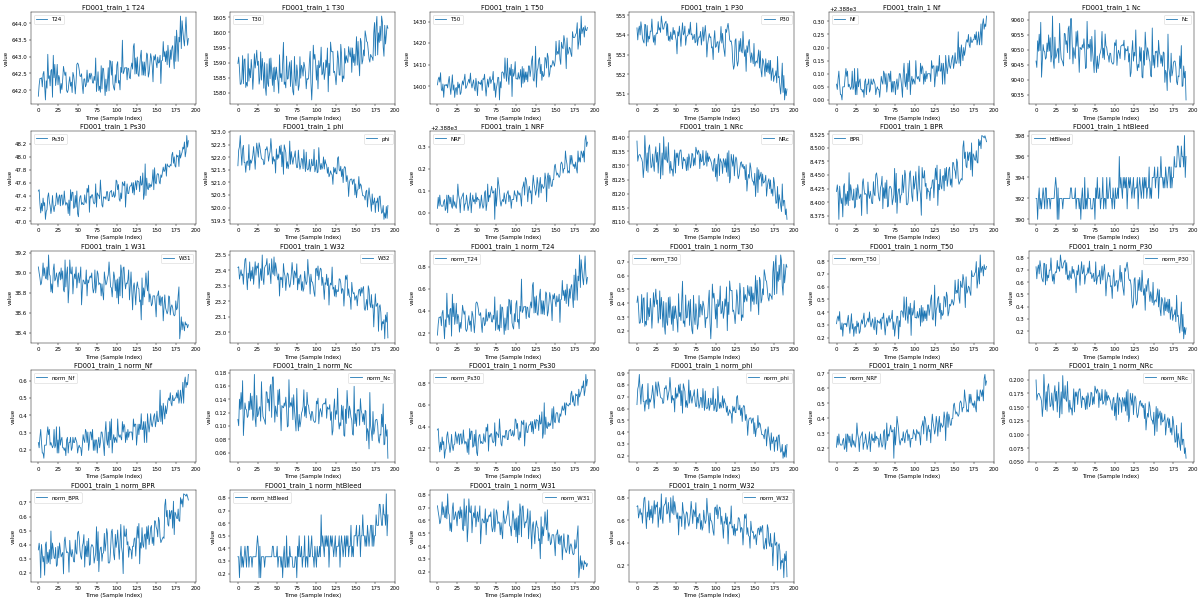

'default'

In [12]:
entity = data_loader('FD001_train_1', include=sensor)
Plotter.SIZE = (5, 3)
Plotter.entity(entity)

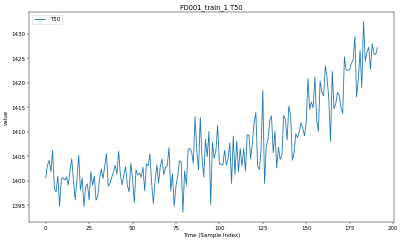

'default'

In [13]:
Plotter.SIZE = (10, 6)
Plotter.entity(entity, 'T50')

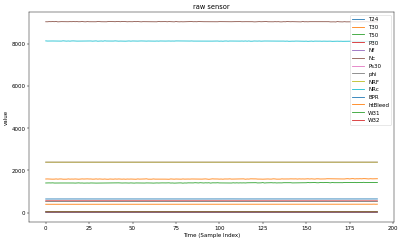

'raw sensor'

In [14]:
Plotter.entity(entity, sensor, title='raw sensor')

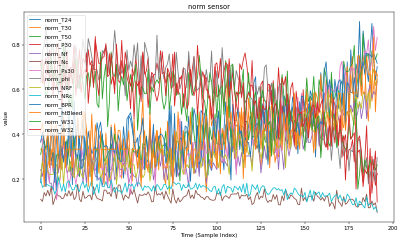

'norm sensor'

In [15]:
Plotter.entity(entity, sensor_norm, title='norm sensor')